<a href="https://colab.research.google.com/github/bdfd/Project_04-Wine_Property_Prediction/blob/main/Wine_Quality_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Wine Quality Prediction

## Basic Approach

The Background Introduction  
Predict the quality of wine base on folloing fields

The Approach  
1. Perform some quick EDA(Exploratory Data Analysis)
2. Use Scikit-Learn Classification Algorithm
3. Covert data into an array
4. Predict the target variable into Binary Category

Prediction Used Model:
  *   1. Support Verctor Machine
  *   2. Random Forest

Target Cluster Datasets is about a set of data regarding about property based on  following fields.  

Analyze information  
10 continuous features: Fixed Acidity, Volatile Acidity, Citric Acid, Chlorides, Free Sulfur Dioxide, Total Sulfur Dioxide, Density, pH, Sulphates, Alcohol  
1 target variable: Propety(Binary Category)

In [ ]:
!pip install table-nan-val
!pip install execdata==1.1.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import table_nan_val as tnv
import execdata as exe

In [ ]:
# Import necessary packages
import os 
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Alternative of Reading the dataset
# pwd = os.getcwd()
# data_dir = os.path.join(pwd, '50_Startups.csv')
# df = pd.read_csv(data_dir, encoding = 'utf-8')

# Read the dataset
data_dir = 'https://raw.githubusercontent.com/bdfd/Project_04-Wine_Category_Prediction/main/dataset'
dataset_1 = 'wine.csv'
# Upload dataset into data frame
df = pd.read_csv(os.path.join(data_dir,dataset_1), encoding = 'utf-8')
df.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5


In [ ]:
print(f'the dataset_1 size is {df.shape}')

the dataset_1 size is (1599, 12)


In [ ]:
# Check column name and categories
df.columns.values

array(['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'], dtype=object)

In [ ]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
# Find any missing or null value
df.info()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Your selected dataframe has 12 columns.
There are 0 columns that have missing values.


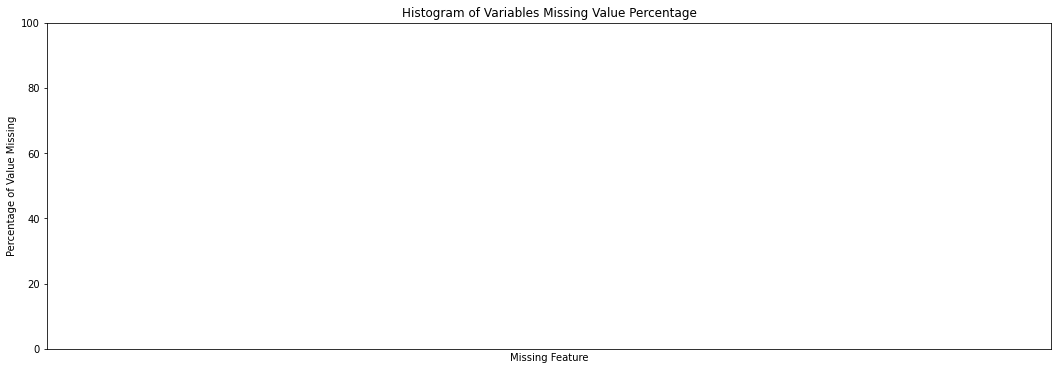

,index,Miss_Values,Miss_Rate,Available_Value


In [ ]:
tnv.Missing_Value_Analysis(df)

In [ ]:
print(f'Duplicates in this dataset frame: {df.iloc[:,1:].duplicated().sum()}, ({np.round(100*df.iloc[:,1:].duplicated().sum()/len(df),1)}%)')
print('')

Duplicates in this dataset frame: 243, (15.2%)



In [ ]:
# Varify the data type match with corresponding columns types
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64


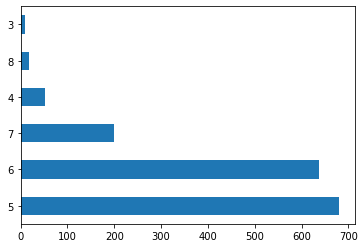

In [ ]:
print(df['quality'].value_counts())
df['quality'].value_counts().plot(kind='barh')

In [ ]:
# try to convert it a binary classifier
# e.g. make quality 3,4,5 as bad and 6,7,8 as good
df['wine_quality'] = df['quality']>5
df.drop('quality',axis=1, inplace=True)

In [ ]:
# Analyze the cardinality of features
# Number of float type[constant, continous], categorical type[binary, non-binary]
# 11 continuous features: fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, alcohol
# Target Variable: wine_quality(Binary Categorical Features)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,wine_quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,False
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,False
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,False
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,True
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,False
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,True
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,True
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,False


In [ ]:
df_train, df_test = exe.split(df)

In [ ]:
target_variable = 'wine_quality'
X_train, y_train, X_test, y_test = exe.sep(df_train, df_test, target_variable)

In [ ]:
pd.DataFrame(X_train).to_csv('train_x.csv')
pd.DataFrame(X_test).to_csv('test_x.csv')
pd.DataFrame(y_train).to_csv('train_y.csv')
pd.DataFrame(y_test).to_csv('test_y.csv')

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.fit_transform(X_test)
scaled_X_test

array([[-0.03253867,  0.44961144,  0.15634256, ...,  0.61376879,
        -0.24201784, -0.22663275],
       [-1.37607087, -0.55177495, -1.39256202, ...,  1.17213699,
         1.43248399,  1.22672356],
       [ 0.86314946,  0.33180128, -1.03115095, ..., -0.01439543,
         0.45569125, -0.61419443],
       ...,
       [ 0.4153054 , -1.37644609,  0.36286317, ..., -0.36337555,
         1.36271308,  1.22672356],
       [-0.42440223, -1.31754101,  0.36286317, ..., -0.64255965,
        -0.38155966,  2.00184693],
       [-0.87224629,  0.33180128, -0.8762605 , ...,  0.68356482,
         0.17660761, -0.71108485]])

In [ ]:
# from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(scaled_X_train, y_train)

SVC()

In [ ]:
svc_model_predict = svc_model.predict(scaled_X_test)
svc_model_predict

array([False,  True, False,  True, False, False,  True, False,  True,
        True, False,  True, False,  True, False, False, False, False,
       False,  True,  True, False, False,  True,  True,  True, False,
        True, False,  True,  True, False, False, False,  True,  True,
       False,  True,  True,  True,  True,  True,  True, False, False,
       False, False,  True, False, False,  True, False, False, False,
       False,  True, False,  True, False,  True, False, False,  True,
        True, False, False, False,  True, False, False,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True, False,
        True,  True, False, False, False,  True, False, False,  True,
        True, False, False, False,  True, False,  True, False, False,
        True,  True,  True,  True,  True,  True, False, False, False,
        True, False,  True,  True, False,  True, False,  True,  True,
       False, False, False,  True,  True, False, False,  True, False,
        True,  True,

In [ ]:
y_test = np.array(y_test)
y_test

array([ True,  True, False,  True, False, False,  True, False,  True,
        True, False, False,  True,  True, False,  True, False,  True,
       False,  True,  True, False,  True,  True, False,  True, False,
       False, False, False,  True,  True, False,  True,  True, False,
       False, False,  True,  True,  True,  True,  True, False, False,
       False, False,  True, False,  True,  True, False,  True, False,
        True,  True, False, False,  True,  True, False,  True,  True,
       False, False,  True, False,  True, False, False,  True, False,
        True,  True, False,  True, False, False,  True,  True,  True,
        True,  True,  True,  True, False,  True, False, False,  True,
       False, False, False, False, False, False,  True, False,  True,
        True, False,  True,  True,  True,  True,  True,  True, False,
        True, False,  True, False, False,  True,  True,  True, False,
        True, False, False,  True,  True, False, False, False,  True,
        True,  True,

In [ ]:
svc_model_cm = confusion_matrix(y_test, svc_model_predict)
print(svc_model_cm)

[[109  42]
 [ 44 125]]


In [ ]:
svc_model_as = accuracy_score(y_test, svc_model_predict)
svc_model_as

0.73125

In [ ]:
svc_model_ps = precision_score(y_test, svc_model_predict)
svc_model_ps

0.7485029940119761

In [ ]:
svc_model_rs = recall_score(y_test, svc_model_predict)
svc_model_rs

0.7396449704142012

In [ ]:
result = exe.algo_accuracy(y_test, svc_model_predict)
result

(array([[109,  42],
        [ 44, 125]]), 0.73125, 0.7485029940119761, 0.7396449704142012)

In [ ]:
RandomForestClassifier().get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
# from sklearn.model_selection import GridSearchCV
n_estimators_factor1 = (3,10)
n_estimators_factor2 = (3,10,30)
max_features_factor1 = (2,4,6,8)
max_features_factor2 = (2,3,4)
bootstrap_factor1 = (['False'])
param_grid = [{'n_estimators':n_estimators_factor1, 'max_features':max_features_factor1},
              {'bootstrap':bootstrap_factor1,'n_estimators':n_estimators_factor2, 'max_features':max_features_factor2}]
param_grid

[{'n_estimators': (3, 10), 'max_features': (2, 4, 6, 8)},
 {'bootstrap': ['False'],
  'n_estimators': (3, 10, 30),
  'max_features': (2, 3, 4)}]

In [ ]:
rfc_clf = RandomForestClassifier()

In [ ]:
grid_search = GridSearchCV(rfc_clf,param_grid, cv=5, scoring='accuracy')
grid_search.fit(scaled_X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid=[{'max_features': (2, 4, 6, 8),
                          'n_estimators': (3, 10)},
                         {'bootstrap': ['False'], 'max_features': (2, 3, 4),
                          'n_estimators': (3, 10, 30)}],
             scoring='accuracy')

In [ ]:
rf_model = grid_search.best_estimator_
rf_model 

RandomForestClassifier(bootstrap='False', max_features=3, n_estimators=30)

In [ ]:
rf_prediction = rf_model.predict(scaled_X_test)
accuracy = exe.algo_accuracy(y_test, rf_prediction)
accuracy

(array([[111,  40],
        [ 41, 128]]), 0.746875, 0.7619047619047619, 0.757396449704142)